Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes  
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 
par vos réponses, et remplissez les champs ci-dessous:

In [1]:
NOM = "VAUDABLE"
PRENOM = "MATTHIS"
GROUPE = "3"
DATE = "11/10/09"

---

# Modélisation d'un feu de forêt à l'aide d'un automate cellulaire
On va dans ce DM s'intéresser à la modélisation d'un feu de forêt grâce à un modèle simple de transmission du feu au travers d'arbres voisins.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Préambule : Affichage de la forêt
On représentera la forêt par un tableau de nombres à deux dimensions. La valeur de la case (i,j) de la grille est donnée par : 
   * 1 s'il y a un arbre
   * 0 s'il n'y a rien
   * -1 s'il y a un arbre qui brule
   * -2 si l'arbre a fini de bruler
   
On donne la fonction plotGrid(T) qui affiche une tableau à deux dimensions en mettant en vert les arbres, en rouge les arbres brulés et en noir le vide

In [3]:
import matplotlib.colors
import numpy as np

def plotGrid(T):
    cmap = matplotlib.colors.ListedColormap(['gray','red','black','green'])
    boundaries = [-2,-1,-0.1,0.9,1.2]
    norm = matplotlib.colors.BoundaryNorm(boundaries, cmap.N, clip=True)
    plt.figure(figsize=(5,5))
    plt.pcolor(T,cmap=cmap,norm=norm)
    plt.show()

### Q1 / Produire une forêt initiale
Faire une fonction produireForet(densite,Lx,Ly) qui renvoie une forêt d'arbres vivants, prenant comme argument la probabilité $p$ d'avoir un arbre par case ($p$ est un float entre 0 et 1). On utilisera la fonction binomial du numpy.random.binomial(n,p,size=None) (regarder sa documentation), en considérant $n=1$. 

On considérera la case (0,0) comme étant la source initiale du feu : elle vaut donc -1 initialement. 

Afficher une forêt de taille size = (10,10) avec une densité $p = 0.9$.

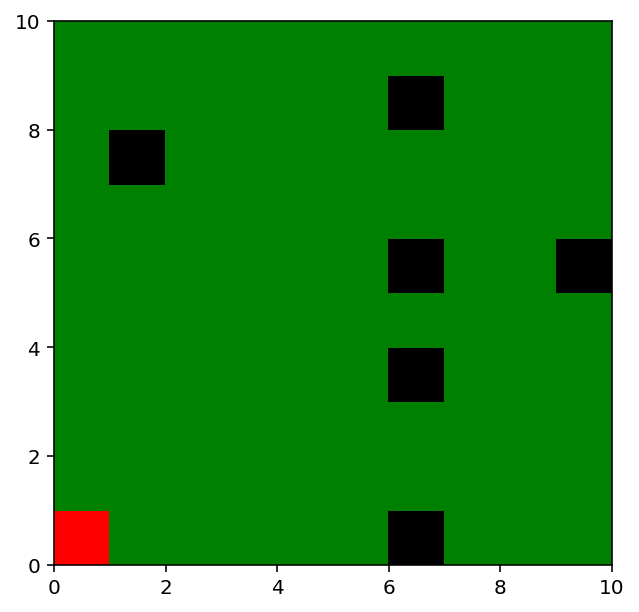

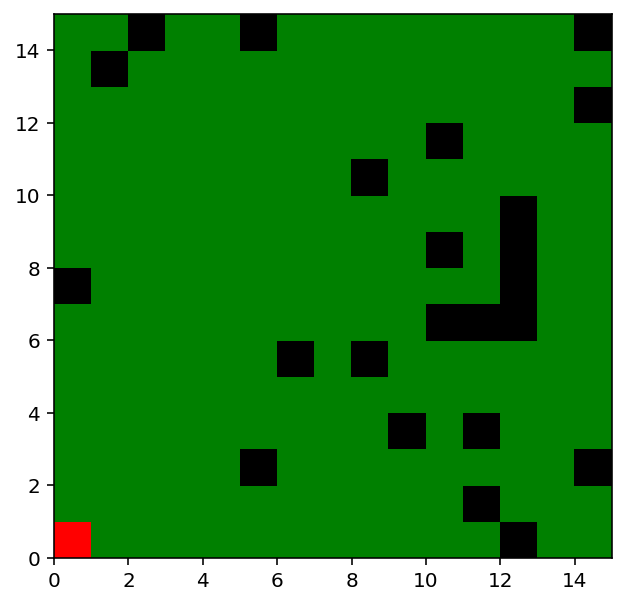

In [138]:
def produireForet(p,Lx,Ly):
    foret = np.ones((Lx,Ly))  #crée un tableau de taille 10 10
    for i in range(Lx):
        for j in range(Ly):
            foret[i][j]=np.random.binomial(1,p,size=None) #met un chiffre aleatoire pour chaque case
    foret[0][0] = -1#depart du feu donne la valeur apres la boucle pour etre sur d'avoir la bonne valeur
    #foret[0][1] = -1  #test pour la fonction listeFlamme
    return foret
#TESTS
plotGrid(produireForet(0.9,10,10))
plotGrid(produireForet(0.9,15,15))

### Q2 / Voisins d'une case
Ecrire une fonction voisins(T,case) qui renvoie un tableau contenant les voisines de la case case dans le tableau T. On fera attention aux cas extrêmes où i ou j est en bord de tableau.

In [5]:
print(np.arange(1,5,1))

[1 2 3 4]


In [8]:
def voisins(T,case):                                          #la fonction renvoie l'indice des cases voisines et leur contenu
    casesVoisines = []
    x,y = case
    a = len(T)-1 #indice max en abscisse de T
    b = len(T[0]) -1#indice max en ordonnée de T
    # on cherche le x min et le x max dans un premier temps
    minX, maxX = 0,0
    if(x == 0): # on cherche le minimum en X
        minX = 0
    else:
        minX = x-1
        casesVoisines.append([minX, y])
    if(x == a):
        maxX = a
    else:
        maxX = x + 1
        casesVoisines.append([maxX, y])
    if(y!=0):
        for i in np.arange(minX,maxX+1 ,1):
            casesVoisines.append([i, y-1])

    if(y != b):
        for i in np.arange(minX,maxX+1,1):
            casesVoisines.append([i, y+1])
    #print(casesVoisines)
    return casesVoisines

#TESTS    
voisins(produireForet(0.9,10,10),[1,7])
voisins(produireForet(0.9,10,10),[0,0])
voisins(produireForet(0.9,10,10),[0,9])
voisins(produireForet(0.9,10,10),[9,9])
voisins(produireForet(0.2,15,15),[1,7])

[[0, 7], [2, 7], [0, 6], [1, 6], [2, 6], [0, 8], [1, 8], [2, 8]]

In [7]:
def voisins(T,case):                                          #la fonction renvoie l'indice des cases voisines et leur contenu
    x,y = case
    a = len(T)-1 #indice max en abscisse de T
    b = len(T[0])-1  #indice max en ordonnée de T
    
    if x==0 and y==0:
        return [[x,y+1],[x+1,y+1],[x+1,y]],[T[x][y+1],T[x+1][y+1],T[x+1][y]]             #cas des 4 coins on definit les case dans le sens horaire
    elif x==a and y==0:
        return [x-1,y],[x-1,y+1],[x,y+1],[T[x-1][y],T[x-1][y+1],T[x][y+1]]
    elif x==a and y==b:
        return [x-1,y],[x-1,y-1],[x,y-1],[T[x-1][y],T[x-1][y-1],T[x][y-1]]
    elif x==0 and y==b:
        return [x,y-1],[x+1,y-1],[x+1,y],[T[x][y-1],T[x+1][y-1],T[x+1][y]]
    
    elif x==0 and 0<y<b :                                                 #bord gauche
        return [x,y-1],[x+1,y-1],[x+1,y],[x+1,y+1],[x,y+1],[T[x][y-1],T[x+1][y-1],T[x+1][y],T[x+1][y+1],T[x][y+1]]
    elif x==a and 0<y<b :                                                 #bord droit
        return [x,y-1],[x-1,y-1],[x-1,y],[x+1,y+1],[x,y+1],[T[x][y-1],T[x-1][y-1],T[x-1][y],T[x+1][y+1],T[x][y+1]]
    elif 0<x<a and y==0 :                                                #bord bas
        return [x-1,y],[x-1,y+1],[x,y+1],[x+1,y+1],[x+1,y],[T[x-1][y],T[x-1][y+1],T[x][y+1],T[x+1][y+1],T[x+1][y]]
    elif 0<x<a and y==b :                                                  #bord haut
        return [x-1,y],[x-1,y-1],[x,y-1],[x+1,y-1],[x+1,y],[T[x-1][y],T[x-1][y-1],T[x][y-1],T[x+1][y-1],T[x+1][y]]
    
    elif 0<x<a and 0<y<b :                                               #milieu on commence par le coiin en haut a gauche
        return [x-1,y+1],[x,y+1],[x+1,y+1],[x+1,y],[x+1,y-1],[x,y-1],[x-1,y-1],[x-1,y],[T[x-1][y+1],T[x][y+1],T[x+1][y+1],T[x+1][y],T[x+1][y-1],T[x][y-1],T[x-1][y-1],T[x-1][y]]

    
#TESTS    
voisins(produireForet(0.9,10,10),[1,7])
voisins(produireForet(0.2,15,15),[1,7])

([0, 8],
 [1, 8],
 [2, 8],
 [2, 7],
 [2, 6],
 [1, 6],
 [0, 6],
 [0, 7],
 [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0])

### Q3 / Qui brûle ?
Ecrire une fonction listeFlamme(T) qui renvoie le nombre d'arbre en train de brûler dans la forêt T. On utilisera la fonction where du module numpy.

In [80]:
def listeFlamme(T): #modifiée ici je renvoie le nombre
    #print(T)
    nmb = np.where(T==1)
    #print(test[1])
    return len(np.where(T==-1)[0])
listeFlamme(produireForet(0.1,10,10))

1

### Q4 / Évolution élémentaire du feu
Ecrire une fonction update(T) qui renvoie un tableau avec l'état de la forêt à l'instant t+1 selon les règles suivantes :
* Si un arbre intact est voisin d'un arbre enflammé alors il s'enflamme. 
* Si un arbre est enflammé alors il est complètement brûlé au tour suivant.
* S'il n'y a rien sur la case alors il n'y a toujours rien au tour suivant. 

Tester la fonction en affichant le résultat de la propagation d'un feu sur une forêt de taille 10x10 et de densité 0.7. On vérifiera en particulier que les arbres se mettent effectivement à bruler lorsqu'ils sont au voisinage du feu et disparaissent après avoir brûlé. Les cases vides sont sensées rester vides.

In [66]:
def update(T):
    enflammees = listeFlamme(T)
    arabres_enflames = np.where(T==-1) # coordonnees des arbres intacts y, x
    for compteur in range(enflammees): #on parcours la liste des arbres intacts
        x = arabres_enflames[0][compteur] #coordonnées
        y = arabres_enflames[1][compteur]
        les_voisins = voisins(T, [x,y])
        for v in les_voisins:
            if T[v[0]][v[1]] == 1:
                T[v[0]][v[1]] = -1
        T[x][y]=-2 #une fois qu on a ttrouve tous les arbres intacts de l'arbre qui brule en sur ce tour on le met a -2

In [67]:
Foret = produireForet(0.7,10,10)
print(Foret) # avant
update(Foret)
print(Foret) # apres

[[-1.  1.  1.  0.  1.  1.  0.  0.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.  1.  0.  1.  1.]
 [ 1.  1.  1.  0.  1.  1.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  1.  1.  0.  1.  1.  0.]
 [ 1.  1.  0.  0.  1.  0.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  0.  1.  1.  0.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  0.  1.  0.]
 [ 1.  0.  1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  0.  1.  1.  0.  1.  1.  1.]
 [ 0.  0.  1.  1.  0.  1.  1.  0.  1.  1.]]
[[-2. -1.  1.  0.  1.  1.  0.  0.  1.  1.]
 [-1.  0.  0.  0.  0.  0.  1.  0.  1.  1.]
 [ 1.  1.  1.  0.  1.  1.  1.  0.  0.  1.]
 [ 0.  0.  1.  0.  1.  1.  0.  1.  1.  0.]
 [ 1.  1.  0.  0.  1.  0.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  0.  1.  1.  0.  1.]
 [ 1.  0.  1.  1.  1.  0.  1.  0.  1.  0.]
 [ 1.  0.  1.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  1.  0.  1.  1.  0.  1.  1.  1.]
 [ 0.  0.  1.  1.  0.  1.  1.  0.  1.  1.]]


In [0]:
# YOUR CODE HERE
raise NotImplementedError()

### Q5 / Laisser le feu évoluer
Faire une fonction NstepBrule(T,Ntours) qui renvoie un tableau correspondant à l'évolution de T au bout de Ntours. Afficher le résultat pour une forêt de 10x10 avec une densité de 0.9 au bout de 1,5,9 et 15 tours. 

In [69]:
def NstepBrule(T, Ntours):
    for i in range(Ntours):
        update(T)

In [77]:
Foret = produireForet(0.9,10,10)
print(Foret)
NstepBrule(Foret,1)
print(Foret)
NstepBrule(Foret,4)
print(Foret)
NstepBrule(Foret,4)
print(Foret)
NstepBrule(Foret,4)
print(Foret)

[[-1.  0.  0.  1.  1.  1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  1.  0.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  0.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  0.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
[[-2.  0.  0.  1.  1.  1.  1.  0.  1.  1.]
 [-1. -1.  1.  1.  1.  0.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  0.  0.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  0.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
[[-2.  0.  0. -2. -2. -1.  1.  0.  1.  1.]
 [-2. -2. -2. -2. -2.  0.  1.  1.  1.  1.]
 [-2. -2. -2. -2. -2. -1.  1.  1.  1.  1.]
 [-2. -2.

### Q5bis / Faire la même chose pour une densité initiale de 0.3. Que peut-on dire ?

In [79]:
Foret = produireForet(0.3,10,10)
print(Foret)
NstepBrule(Foret,1)
print(Foret)
NstepBrule(Foret,4)
print(Foret)
NstepBrule(Foret,4)
print(Foret)
NstepBrule(Foret,4)
print(Foret)

[[-1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  1.  0.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]]
[[-2.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  1.  0.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1.]]
[[-2.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.

YOUR ANSWER HERE

### Q6 / Constater les dégâts
Faire une fonction popBrule(T0,Ntours) qui renvoie l'évolution de la population d'arbres brûlés pendant Ntours en fonction du temps en partant d'un tableau initial T0. Faire une fonction Narbres(T0) qui renvoie le nombre d'arbre vivants dans le tableau T0.

In [122]:
def popBrule(T0, Ntours):
    T_tours = np.copy(T0)
    casesVoisines = []
    #casesVoisines.append(len(np.where(T_tours==-2)[0])) # -2 ????????????
    # on ajoute avant la boucle pour prise en compte de letat itial
    for i in range(Ntours):
        update(T_tours)
        casesVoisines.append(len(np.where(T_tours==-2)[0]))
    return casesVoisines

def Narbres(T0): #jai pas compris ce qui est demande ici ???
    return len(np.where(T0==1)[0])

In [111]:
Foret = produireForet(0.9,10,10)
popBrulees = popBrule(Foret, 15)
print(popBrulees)
NstepBrule(Foret,15) # tableau quia ete copie donc le mettre a jour manuellement comme ici
print(Foret)


[1, 4, 7, 14, 22, 30, 42, 55, 70, 87, 88, 88, 88, 88, 88]
[[-2. -2. -2. -2. -2. -2. -2. -2. -2. -2.]
 [-2. -2.  0. -2. -2. -2. -2. -2. -2. -2.]
 [ 0. -2. -2. -2. -2. -2. -2. -2. -2. -2.]
 [-2. -2. -2. -2. -2.  0. -2. -2. -2. -2.]
 [-2. -2. -2. -2.  0. -2. -2. -2. -2. -2.]
 [-2.  0. -2. -2. -2. -2. -2. -2. -2. -2.]
 [ 0. -2. -2. -2. -2. -2. -2. -2.  0. -2.]
 [ 0. -2.  0. -2. -2. -2. -2. -2. -2. -2.]
 [-2. -2. -2.  0. -2. -2. -2. -2. -2. -2.]
 [-2. -2. -2. -2. -2. -2.  0.  0. -2. -2.]]


### Q7 / Observation du comportement en fonction de la densité
Tracer sur un même graphe plusieurs courbes d'évolution de la proportion d'arbres brûlés pour une densité initiale de 0.9. On tracera les résultats sous forme de pourcentage de la population totale. 

On prendra une taille de la forêt de 50x50 pour faire la simulation et un nombre de pas de 100.

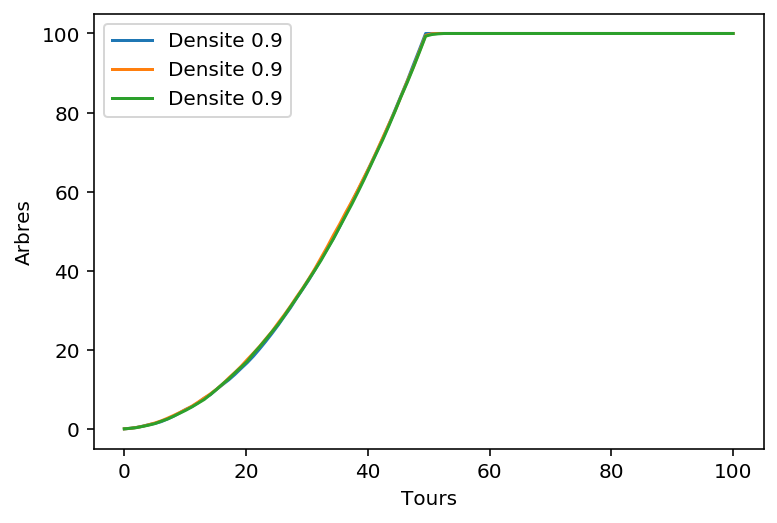

In [149]:
fig, ax = plt.subplots()#figsize=(5,5)
x = np.linspace(0, 100, 100)

Foret = produireForet(0.9,50,50)
tous_les_arbres = Narbres(Foret) + listeFlamme(Foret)
popBrulees = popBrule(Foret, 100)
plt.plot(x, np.array(popBrulees)/tous_les_arbres*100, label="Densite 0.9")

Foret = produireForet(0.9,50,50)
tous_les_arbres = Narbres(Foret) + listeFlamme(Foret)
popBrulees = popBrule(Foret, 100)
plt.plot(x, np.array(popBrulees)/tous_les_arbres*100, label="Densite 0.9")

Foret = produireForet(0.9,50,50)
tous_les_arbres = Narbres(Foret) + listeFlamme(Foret)
popBrulees = popBrule(Foret, 100)
plt.plot(x, np.array(popBrulees)/tous_les_arbres*100, label="Densite 0.9")

ax.set_xlabel("Tours") # titre de l'axe des  abscisses
ax.set_ylabel("Arbres") # titre de l'axe des ordonnées
plt.legend()
plt.show()

### Q7bis Faire la même chose pour une densité initiale de 0.3 (on ne fera que 20 pas de temps).

797
[[-1.  0.  0. ...  1.  0.  1.]
 [ 1.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  1.]
 ...
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 1.  0.  1. ...  0.  1.  0.]
 [ 0.  0.  0. ...  1.  0.  1.]]


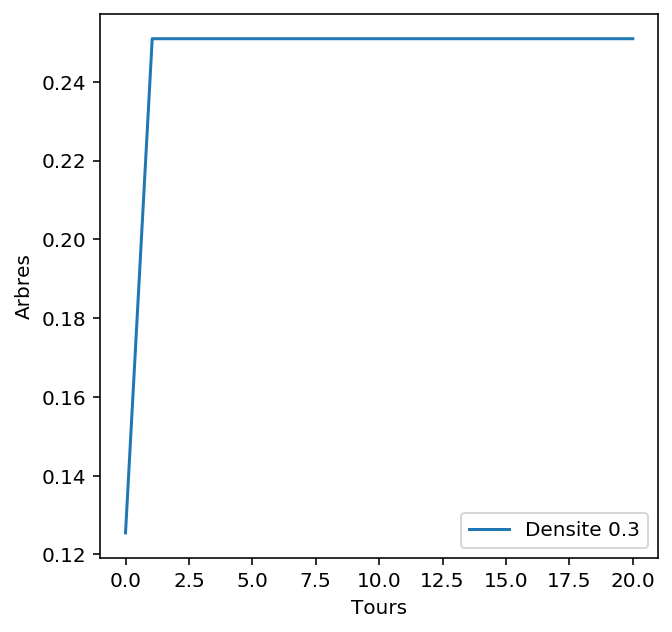

In [167]:
fig, ax = plt.subplots(figsize=(5,5))
x = np.linspace(0, 20, 20)

Foret = produireForet(0.3,50,50)
tous_les_arbres = Narbres(Foret) + listeFlamme(Foret)
print(tous_les_arbres)
popBrulees = popBrule(Foret, 20)
plt.plot(x, np.array(popBrulees)/tous_les_arbres*100, label="Densite 0.3")
print(Foret)
ax.set_xlabel("Tours") # titre de l'axe des  abscisses
ax.set_ylabel("Arbres") # titre de l'axe des ordonnées
plt.legend()
plt.show()

### Q7ter / Quelle est la différence entre les deux densités ?

YOUR ANSWER HERE

### Q8 / Comportement moyen (BONUS)
Pour des grilles de taille 25x25, et sur une durée de 50 pas, faire la moyenne des courbes d'évolution sur 1000 réalisations pour des densités de 0.9, 0.7 et 0.3. Afficher les courbes moyennes ainsi obtenues sur un même graphique.

In [0]:
# YOUR CODE HERE
raise NotImplementedError()

### Q8bis / Que remarque-t-on ?

YOUR ANSWER HERE

### Q9 / Percolation (BONUS)
En faisant varier la densité entre 0 et 1 sur une vingtaine de points et avec le même type de paramètres que dans la question précédente, tracer sur une courbe la proportion finale d'arbres brûlés en fonction de la densité initiale de la forêt.

In [0]:
# YOUR CODE HERE
raise NotImplementedError()

La courbe devrait en fait commencer à zéro si la taille du système était réellement infinie. À partir d'une valeur seuil de densité d0, elle doit commencer à croître. On dit que le système subit une percolation. Au-delà d'une certaine densité d'arbres l'incendie ravagera une proportion non nulle de la forêt....